In [1]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [2]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [6]:
labels = ["飛機", "汽車", "鳥", "貓", "鹿",
          "狗", "青蛙", "馬", "船", "卡車"]

卡車


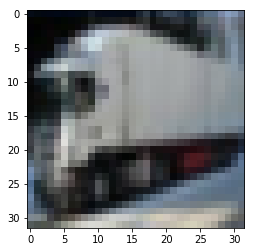

In [28]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 49999)
print(labels[y_train[c][0]])
plt.imshow(x_train[c])

In [30]:
x_train_shape = x_train / 255
x_test_shape = x_test / 255
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
# DEMO
y_train_cat[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [38]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense
from keras.layers import Flatten
cnn = Sequential()
# 9(格子) * 3(RGB) * 32(filters) + 32(bias)
cnn.add(Conv2D(32, (3, 3),
               activation="relu",
               padding="same",
               input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# 9 * 32(上一層特徵) * 64 + 64
cnn.add(Conv2D(64, (3, 3),
               activation="relu",
               padding="same"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# 9 * 32(上一層特徵) * 64 + 64
cnn.add(Conv2D(128, (3, 3),
               activation="relu",
               padding="same"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# MLP(大腦)
cnn.add(Flatten())
cnn.add(Dense(256, activation="relu"))
cnn.add(Dense(10, activation="softmax"))
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
__________

In [39]:
cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
cnn.fit(x_train_shape, y_train_cat, batch_size=200, epochs=10, validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
43000/45000 [===========================>..] - ETA: 3s - loss: 1.6325 - acc: 0.4071